## Facial Expression Recognition using YOLO12

This project uses YOLOv12 to directly detect facial expressions as object classes, focusing on 7 emotions such as happy, sad, angry, etc.
The model is trained on the **FER2013** from [Kaggle](https://www.kaggle.com/datasets/msambare/fer2013), which contains grayscale 48×48 pixel face images labeled with emotion categories.
The task is to classify facial expressions into one of **7 categories** using deep learning (CNN).

### Emotion Classes:
- **0** = Angry  
- **1** = Disgust  
- **2** = Fear  
- **3** = Happy  
- **4** = Sad  
- **5** = Surprise  
- **6** = Neutral

### Setup & Preperations

#### handling imports and preparing the data set

In [1]:
# Data handling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, datasets, models, utils
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision.datasets import ImageFolder

# Utils
import os
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix

#YOLO 
from ultralytics import YOLO
path_to_bus_image = "../data/bus.jpg"

This is a multi-class classification problem. We will use Convolutional Neural Networks (CNN) to learn spatial features from the face images and predict one of the 7 emotions.

In [2]:
# Define image transformations for training and testing
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # FER2013 is grayscale
    transforms.Resize((48, 48)),                  # just in case
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))          # normalize to [-1, 1]
])

# Define paths
train_dir = './../data/train'
test_dir = './../data/test'

# Load datasets
train_dataset = ImageFolder(root=train_dir, transform=transform)
test_dataset = ImageFolder(root=test_dir, transform=transform)

# Create DataLoaders
batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Map class indices to emotion names
emotion_labels = train_dataset.classes
print("Emotion labels:", emotion_labels)

Emotion labels: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


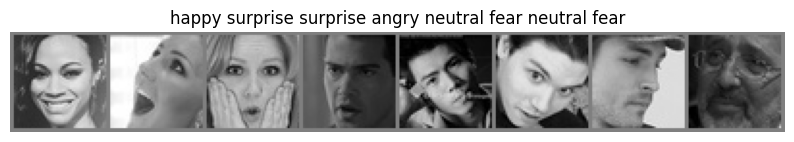

In [3]:
# Function to unnormalize image
def imshow(img, title):
    img = img * 0.5 + 0.5  # unnormalize from [-1,1] to [0,1]
    npimg = img.numpy()
    plt.figure(figsize=(10,4))
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Get a batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images and their corresponding labels
imshow(utils.make_grid(images[:8], nrow=8), 
       title=' '.join(emotion_labels[labels[j]] for j in range(8)))

### YOLO12: Evalutation

#### playing with the model to understand it better

In [4]:
# Load a COCO-pretrained YOLO12n model
print('Testing YOLO import...')
model = YOLO("yolo12n.pt")
print('Model loaded successfully')

Testing YOLO import...
Model loaded successfully


In [5]:
# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="coco8.yaml", epochs=10, imgsz=640)



Ultralytics 8.3.170 🚀 Python-3.13.4 torch-2.7.1 CPU (Apple M1 Pro)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, project=None

train: Scanning /Users/user/dev/personal/datasets/coco8/labels/train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 179.0±52.5 MB/s, size: 54.0 KB)



val: Scanning /Users/user/dev/personal/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

Plotting labels to /Users/user/dev/personal/facial-expression-classifier/runs/detect/train4/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /Users/user/dev/personal/facial-expression-classifier/runs/detect/train4
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.8894      1.163      1.215         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all          4         17     0.0303      0.217     0.0876     0.0435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       2/10         0G      1.075      1.518      1.405         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all          4         17     0.0601      0.467      0.122     0.0569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       3/10         0G     0.7052     0.9304      1.092         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all          4         17     0.0692      0.567      0.136     0.0678

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       4/10         0G     0.7829     0.9319      1.062         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all          4         17      0.062      0.567      0.256       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       5/10         0G     0.8066      0.907      1.113         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all          4         17      0.138      0.315      0.258      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       6/10         0G       1.07      1.738      1.499         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all          4         17       0.32      0.278      0.264      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.7149     0.7385      1.016         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all          4         17       0.52      0.337      0.282      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       8/10         0G     0.7483      1.029      1.141         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all          4         17      0.538      0.345      0.298      0.217

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       9/10         0G     0.6999     0.9329      1.002         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all          4         17       0.55       0.35      0.317      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      10/10         0G     0.9729      1.009      1.277         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all          4         17      0.569      0.362      0.338      0.254

10 epochs completed in 0.006 hours.


Optimizer stripped from /Users/user/dev/personal/facial-expression-classifier/runs/detect/train4/weights/last.pt, 5.6MB
Optimizer stripped from /Users/user/dev/personal/facial-expression-classifier/runs/detect/train4/weights/best.pt, 5.6MB

Validating /Users/user/dev/personal/facial-expression-classifier/runs/detect/train4/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.13.4 torch-2.7.1 CPU (Apple M1 Pro)
YOLOv12n summary (fused): 159 layers, 2,590,824 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]


                   all          4         17      0.565      0.359      0.338      0.254
                person          3         10      0.427      0.156      0.267        0.2
                   dog          1          1          1          0      0.199      0.119
                 horse          1          2      0.441          1      0.497      0.237
              elephant          1          2          0          0          0          0
              umbrella          1          1      0.522          1      0.995      0.895
          potted plant          1          1          1          0     0.0711     0.0711
Speed: 0.7ms preprocess, 109.7ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to /Users/user/dev/personal/facial-expression-classifier/runs/detect/train4


Ultralytics 8.3.170 🚀 Python-3.13.4 torch-2.7.1 CPU (Apple M1 Pro)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train42, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, project=Non

train: Scanning /Users/user/dev/personal/datasets/coco8/labels/train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1343.1±371.3 MB/s, size: 54.0 KB)



val: Scanning /Users/user/dev/personal/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

Plotting labels to /Users/user/dev/personal/facial-expression-classifier/runs/detect/train42/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /Users/user/dev/personal/facial-expression-classifier/runs/detect/train42
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.7906     0.8378      1.152         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all          4         17      0.577      0.367      0.346      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       2/10         0G      0.778      1.084       1.24         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all          4         17      0.666       0.35      0.464      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       3/10         0G      0.711     0.7272      1.075         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all          4         17      0.704      0.359      0.479      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       4/10         0G     0.6712     0.7024      1.001         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all          4         17        0.7      0.367      0.485      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       5/10         0G     0.6877     0.6912      1.046         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all          4         17      0.753      0.366      0.487       0.36

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       6/10         0G     0.9511      1.395      1.374         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all          4         17      0.779      0.364      0.497      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       7/10         0G     0.6238     0.5926     0.9813         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all          4         17      0.786      0.366      0.509      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.6631     0.8452      1.058         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all          4         17      0.709      0.378      0.491      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       9/10         0G     0.6704     0.7608     0.9784         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all          4         17       0.79      0.355      0.549      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      10/10         0G     0.9383     0.8285      1.248         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all          4         17      0.793      0.358      0.549      0.418

10 epochs completed in 0.006 hours.


Optimizer stripped from /Users/user/dev/personal/facial-expression-classifier/runs/detect/train42/weights/last.pt, 5.6MB
Optimizer stripped from /Users/user/dev/personal/facial-expression-classifier/runs/detect/train42/weights/best.pt, 5.6MB

Validating /Users/user/dev/personal/facial-expression-classifier/runs/detect/train42/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.13.4 torch-2.7.1 CPU (Apple M1 Pro)
YOLOv12n summary (fused): 159 layers, 2,590,824 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]


                   all          4         17      0.793      0.358      0.549      0.418
                person          3         10          1      0.186      0.561      0.318
                   dog          1          1          1          0      0.497      0.298
                 horse          1          2          1      0.962      0.995      0.648
              elephant          1          2          0          0          0          0
              umbrella          1          1      0.757          1      0.995      0.995
          potted plant          1          1          1          0      0.249      0.249
Speed: 0.6ms preprocess, 112.1ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to /Users/user/dev/personal/facial-expression-classifier/runs/detect/train42

image 1/1 /Users/user/dev/personal/facial-expression-classifier/src/../data/bus.jpg: 640x480 4 persons, 1 bus, 110.5ms
Speed: 1.8ms preprocess, 110.5ms inference, 0.7ms postprocess per image at shape (

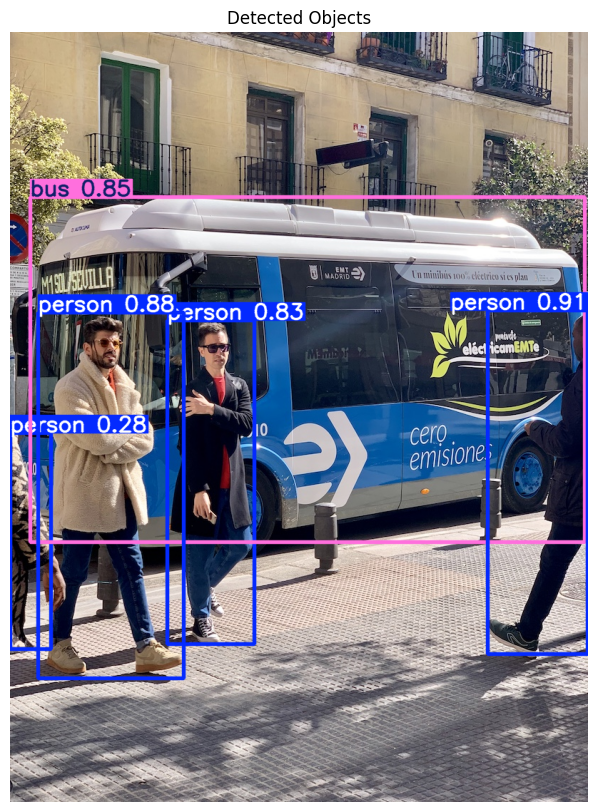

In [6]:
# Train the model on the COCO8 example dataset for 100 epochs
train_results = model.train(data="coco8.yaml", epochs=10, imgsz=640)

# Run inference with the YOLO12n model on the 'bus.jpg' image
results = model(path_to_bus_image)

# Plot the results on the image
annotated_image = results[0].plot()

# Convert the annotated image (numpy array in BGR format) to RGB for displaying with matplotlib
annotated_image_rgb = annotated_image[..., ::-1]

# Display the annotated image
plt.figure(figsize=(10, 10))
plt.imshow(annotated_image_rgb)
plt.title("Detected Objects")
plt.axis('off')
plt.show()



### YOLO12 Training from Scratch with Adam Optimizer

#### Preparing the model for facial expression classification training


In [4]:
# Create a new YOLO12 model from scratch for facial expression classification
from ultralytics import YOLO
import os

# Define paths
data_yaml_path = "../data/fer2013.yaml"
model_yaml_path = "../models/yolo12_fer2013.yaml"

# Create a new YOLO12 model from scratch
model = YOLO(model_yaml_path)

print("YOLO12 model created from scratch for FER2013 classification")
print(f"Model configuration: {model_yaml_path}")
print(f"Dataset configuration: {data_yaml_path}")
#print(f"Number of classes: {model.model.nc}")
print(f"Model parameters: {sum(p.numel() for p in model.model.parameters()):,}")


YOLO12 model created from scratch for FER2013 classification
Model configuration: ../models/yolo12_fer2013.yaml
Dataset configuration: ../data/fer2013.yaml
Model parameters: 76,710,949


In [5]:
# Configure training parameters for Adam optimizer
training_config = {
    'data': data_yaml_path,
    'epochs': 100,
    'imgsz': 48,  # FER2013 images are 48x48
    'batch': 32,  # Batch size
    'optimizer': 'Adam',  # Use Adam optimizer
    'lr0': 0.001,  # Initial learning rate
    'lrf': 0.01,    # Final learning rate fraction
    'momentum': 0.9,  # Adam beta1
    'weight_decay': 0.0005,  # Weight decay
    'warmup_epochs': 3,  # Warmup epochs
    'patience': 20,  # Early stopping patience
    'save': True,  # Save checkpoints
    'save_period': 10,  # Save every 10 epochs
    'device': 'auto',  # Auto-detect device
    'workers': 4,  # Number of workers
    'project': '../runs/classify',  # Project directory
    'name': 'yolo12_fer2013_adam',  # Experiment name
    'exist_ok': True,  # Overwrite existing experiment
    'pretrained': False,  # Train from scratch
    'cache': False,  # Cache images for faster training
    'amp': True,  # Automatic mixed precision
    'verbose': True,  # Verbose output
    'seed': 42,  # Random seed
    'deterministic': True,  # Deterministic training
    'single_cls': False,  # Multi-class classification
    'rect': False,  # Rectangular training
    'cos_lr': False,  # Cosine learning rate scheduler
    'close_mosaic': 10,  # Close mosaic augmentation
    'overlap_mask': True,  # Overlap masks during training
    'mask_ratio': 4,  # Mask downsample ratio
    'dropout': 0.0,  # Dropout rate
    'val': True,  # Run validation
    'plots': True,  # Generate plots
}

print("Training configuration:")
for key, value in training_config.items():
    print(f"  {key}: {value}")


Training configuration:
  data: ../data/fer2013.yaml
  epochs: 100
  imgsz: 48
  batch: 32
  optimizer: Adam
  lr0: 0.001
  lrf: 0.01
  momentum: 0.9
  weight_decay: 0.0005
  warmup_epochs: 3
  patience: 20
  save: True
  save_period: 10
  device: auto
  workers: 4
  project: ../runs/classify
  name: yolo12_fer2013_adam
  exist_ok: True
  pretrained: False
  cache: False
  amp: True
  verbose: True
  seed: 42
  deterministic: True
  single_cls: False
  rect: False
  cos_lr: False
  close_mosaic: 10
  overlap_mask: True
  mask_ratio: 4
  dropout: 0.0
  val: True
  plots: True


In [6]:
# Start training the YOLO12 model from scratch
print("Starting YOLO12 training from scratch with Adam optimizer...")
print("This will take some time depending on your hardware.")

# Train the model
results = model.train(**training_config)

print("Training completed!")
print(f"Best model saved at: {results.save_dir}")
print(f"Training metrics: {results.results_dict}")


Starting YOLO12 training from scratch with Adam optimizer...
This will take some time depending on your hardware.
Ultralytics 8.3.170 🚀 Python-3.13.4 torch-2.7.1 


ValueError: Invalid CUDA 'device=auto' requested. Use 'device=cpu' or pass valid CUDA device(s) if available, i.e. 'device=0' or 'device=0,1,2,3' for Multi-GPU.

torch.cuda.is_available(): False
torch.cuda.device_count(): 0
os.environ['CUDA_VISIBLE_DEVICES']: None
See https://pytorch.org/get-started/locally/ for up-to-date torch install instructions if no CUDA devices are seen by torch.


In [ ]:
# Evaluate the trained model
print("Evaluating the trained model...")

# Run validation
val_results = model.val()

print("Validation results:")
print(f"Top-1 Accuracy: {val_results.top1:.4f}")
print(f"Top-5 Accuracy: {val_results.top5:.4f}")

# Show confusion matrix if available
if hasattr(val_results, 'confusion_matrix') and val_results.confusion_matrix is not None:
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    cm = val_results.confusion_matrix.matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=emotion_labels, yticklabels=emotion_labels)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


In [ ]:
# Test the model on sample images
print("Testing the model on sample images...")

# Get a batch of test images
test_iter = iter(test_loader)
test_images, test_labels = next(test_iter)

# Convert PyTorch tensor to PIL Image for YOLO
from PIL import Image
import torchvision.transforms as transforms

# Test on multiple images
num_samples = 5
fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))

for i in range(num_samples):
    # Convert tensor to PIL image
    test_image = test_images[i]
    test_image_pil = transforms.ToPILImage()(test_image)
    
    # Run inference
    pred_results = model(test_image_pil)
    
    # Get prediction
    pred_class = pred_results[0].probs.top1
    pred_conf = pred_results[0].probs.top1conf.item()
    true_label = emotion_labels[test_labels[i]]
    
    # Display image
    axes[i].imshow(test_image_pil, cmap='gray')
    axes[i].set_title(f'True: {true_label}\nPred: {pred_class}\nConf: {pred_conf:.3f}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Save and export the trained model
print("Saving and exporting the trained model...")

# Save the trained model
model_path = "../models/yolo12_fer2013_trained.pt"
model.save(model_path)
print(f"Trained model saved to: {model_path}")

# Export the model to different formats
print("Exporting model to different formats...")

try:
    # Export to ONNX
    onnx_path = model.export(format='onnx')
    print(f"ONNX model saved to: {onnx_path}")
except Exception as e:
    print(f"ONNX export failed: {e}")

try:
    # Export to TorchScript
    torchscript_path = model.export(format='torchscript')
    print(f"TorchScript model saved to: {torchscript_path}")
except Exception as e:
    print(f"TorchScript export failed: {e}")

print("Model saving and export completed!")
